In [2]:
from pandas import Series, DataFrame
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


---

The exam has 20 questions.
* Q1 is a conceptual question with 3 parts, each worth 3 points.
* Q2-Q19 is about a dataset of drug overdoses.
    * Q2 is worth 3 points
    * Q3-Q15 are worth 4 points each
    * Q16-Q18 are worth 6 points each
    * Q19 is worth 8 points
* Q20 is a classification question on a dataset of chess games.
    * Part (a) is worth 7 points
    * Part (b) is worth 3 points

*Best of luck!*

---

![Figures](Figures.png)

Consider the two datasets above, where the two colors correspond to two different classes. For the following questions, provide a short reason for your answers. You may use the points named in the figures (from A to P) for your explanations. If there are multiple possible choices for your answer, you can provide any one.

### [Q1(a) 3 points]
Which dataset can I classify better using a depth-1 decision tree (which only allows one top-level split)?

We can classify Dataset 1 better using a depth-1 decision tree because it gives 1/2 accuracy when we split by drawing a line from point H to point I. 

### [Q1(b) 3 points]
Which dataset can I classify better using a depth-2 decision tree?

We can classify Dataset 1 better using a depth-2 decision tree because it gives perfect accuracy when we split by drawing two lines(one from H to I and another from B to O). Plus, Dataset2 requires diagonal lines. 

### [Q1(c) 3 points]
Can any linear separator achieve better than 50% accuracy on Dataset 1? Why or why not?

Yes. We can perfectly classify the dataset by two linear separators from H to I and from B to O. 

---

We will consider a dataset (*overdoses.csv*) where each row represents one drug-related death in Connecticut. We will use the following fields:
* Date, Age, Sex, and Race are self-explanatory
* ResidenceCity and ResidenceCounty are the city and county where the deceased person lived.
* DeathCity and DeathCounty are the city and county where the death was reported.
* COD is a text string for the Cause Of Death
* Location is the place where the person died. For example, it could be a Hospital.
* LocationifOther is an extra string giving more details about the Location.
* There are many columns for individual drugs. For example, under the column named "Heroin", we have a "Y" if the person had Heroin in their blood. If there was no Heroin in their blood, the value is missing.
    * Sometimes the value may be something other than a "Y". When this happens, we will just think of it as missing.
    * The "Other" column lists drug names instead of a "Y". We will ignore the "Other" column.
* DeathCityGeo and ResidenceCityGeo give latitude and longitude coordinates for the death and residence cities

### [Q2 3 points] Read in overdoses.csv

Print the SECOND row.

In [8]:
drug_df = pd.read_csv("overdoses.csv")
drug_df.iloc[1,:]

ID                                                 13-0102
Date                                        3/21/2013 0:00
DateType                                       DateofDeath
Age                                                     48
Sex                                                   Male
Race                                                 Black
ResidenceCity                                      NORWALK
ResidenceCounty                                        NaN
ResidenceState                                         NaN
DeathCity                                          NORWALK
DeathCounty                                      FAIRFIELD
Location                                          Hospital
LocationifOther                                        NaN
DescriptionofInjury                                    NaN
InjuryPlace                                            NaN
InjuryCity                                             NaN
InjuryCounty                                           N


In some of the following questions, we will need to access the columns corresponding to various drugs.
To make it easier, I have created a list called **drug_names** that you should use in your code. 

* You will need this in Q14, Q16, Q18, and Q19.

**Make sure you run this code cell before proceeding**

In [9]:
drug_names = ['Heroin', 'Cocaine', 'Fentanyl', 'FentanylAnalogue', 'Oxycodone', 'Oxymorphone',
              'Ethanol', 'Hydrocodone', 'Benzodiazepine', 'Methadone', 'Amphet', 'Tramad',
              'Morphine_NotHeroin', 'Hydromorphone', 'OpiateNOS', 'AnyOpioid']

In [10]:
drug_df.head()

,ID,Date,DateType,Age,Sex,Race,ResidenceCity,ResidenceCounty,ResidenceState,DeathCity,...,Tramad,Morphine_NotHeroin,Hydromorphone,Other,OpiateNOS,AnyOpioid,MannerofDeath,DeathCityGeo,ResidenceCityGeo,InjuryCityGeo
0,14-0273,6/28/2014 0:00,DateReported,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)"
1,13-0102,3/21/2013 0:00,DateofDeath,48.0,Male,Black,NORWALK,NaN,NaN,NORWALK,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"Norwalk, CT\n(41.11805, -73.412906)","NORWALK, CT\n(41.11805, -73.412906)","CT\n(41.575155, -72.738288)"
2,16-0165,3/13/2016 0:00,DateofDeath,30.0,Female,White,SANDY HOOK,FAIRFIELD,CT,DANBURY,...,NaN,NaN,NaN,NaN,NaN,Y,Accident,"Danbury, CT\n(41.393666, -73.451539)","SANDY HOOK, CT\n(41.419998, -73.282501)",NaN
3,16-0208,3/31/2016 0:00,DateofDeath,23.0,Male,White,RYE,WESTCHESTER,NY,GREENWICH,...,NaN,NaN,NaN,NaN,NaN,Y,Accident,"Greenwich, CT\n(41.026526, -73.628549)",NaN,NaN
4,13-0052,2/13/2013 0:00,DateofDeath,22.0,Male,"Asian, Other",FLUSHING,QUEENS,NaN,GREENWICH,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"Greenwich, CT\n(41.026526, -73.628549)",NaN,"CT\n(41.575155, -72.738288)"


### [Q3 4 points] What is the ratio of Males to Females in this dataset?

In [17]:
(drug_df['Sex'].value_counts()[0]) / (drug_df['Sex'].value_counts()[1])

2.8467924528301887

### [Q4 4 points] How often is the DeathCity the same as the ResidenceCity?

In [30]:
mask = drug_df['DeathCity'] == drug_df['ResidenceCity']
print("Total of {}, {} without duplicates".format(len(drug_df[mask]), len(drug_df[mask]['DeathCity'].value_counts())))

Total of 3595, 214 without duplicates


### [Q5 4 points] How many rows are missing either the ResidenceCity or the DeathCity or both?

In [35]:
na_mask = drug_df['ResidenceCity'].isna() | drug_df['DeathCity'].isna()
print("There are total of {} missing rows".format(len(drug_df[na_mask])))

There are total of 172 missing rows


### [Q6 4 points] Cities per county

Print out the number of unique DeathCity in each DeathCounty.
* Sometimes either DeathCity or DeathCounty is missing. You should not count these missing rows.
* You will find one obviously-wrong value for DeathCounty. Don't worry about it.

In [39]:
a = drug_df[['DeathCity', 'DeathCounty']].dropna().drop_duplicates()
print("There are {} unique DeathCity in each DeathCounty.".format(len(a)))

There are 217 unique DeathCity in each DeathCounty.


### [Q7 4 points] Drugs for age groups

Split the deaths into 5 equal-sized groups based on Age.
* Each group should have (roughly) the same number of people.

Find the most common COD for each age group.

In [84]:
#age_s = drug_df['Age'].dropna()
age_percentile = pd.qcut(drug_df['Age'], 5, labels=['14-30', '30-38', '38-46', '46-54', '54-87'])
drug_df['age_quantile'] = age_percentile
ct_COD = pd.crosstab(drug_df['COD'], drug_df['age_quantile'])
ct_COD.idxmax()

age_quantile
14-30    Acute Fentanyl Intoxication
30-38    Acute Fentanyl Intoxication
38-46            Heroin Intoxication
46-54         Multiple Drug Toxicity
54-87         Multiple Drug Toxicity
dtype: object

### [Q8 4 points] Among deaths where the Location of death was a person's Residence, find the number of deaths in each ResidenceCity.

Plot the number of such deaths in the top-10 Residence Cities.

In [89]:
mask_residence = drug_df['Location'] == "Residence"
drug_df[['Location', 'ResidenceCity']][mask_residence]['ResidenceCity'].value_counts()

HARTFORD       152
WATERBURY      133
BRIDGEPORT     122
NEW HAVEN      117
NEW BRITAIN    111
              ... 
NO HAVEN         1
SPRAGUE          1
WOLCOTT          1
KINGSTON         1
WEATOGUE         1
Name: ResidenceCity, Length: 220, dtype: int64

### [Q9 4 points] For each Race, find the most common Sex among those who died.

In [105]:
race_sex_ct = pd.crosstab(drug_df['Sex'], drug_df['Race'])
race_sex_ct.idxmax()

Race
Asian Indian                Male
Asian, Other                Male
Black                       Male
Chinese                   Female
Hawaiian                    Male
Hispanic, Black             Male
Hispanic, White             Male
Native American, Other      Male
Other                       Male
Unknown                     Male
White                       Male
dtype: object

### [Q10 4 points] Among the deaths where the COD is "Cocaine Intoxication", what fraction has a 'Y' under the Cocaine column?

In [121]:
coc_mask = drug_df['COD'] == "Cocaine Intoxication"
vc = drug_df[['COD', 'Cocaine']][coc_mask]['Cocaine'].value_counts()
print("There are only {} Y's and no others".format(list(vc)[0]))

There are only 42 Y's and no others


### [Q11 4 points] Among deaths where Cocaine is detected but the COD does not mention 'Cocaine' or 'COCAINE', what is the most common COD?

In [143]:
coc_mask2 = drug_df['Cocaine'] == "Y"

def is_coc(s):
    if ('Cocaine' in s) or 'COCAINE' in s:
        return False
    else:
        return True
    
mask2 = drug_df['COD'].map(is_coc)
drug_df[['COD', 'Cocaine']][coc_mask2][mask2]['COD'].value_counts()[:1]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


Multiple Drug Toxicity    38
Name: COD, dtype: int64

### [Q12 4 points] Plot number of deaths by Race.

Remove the "Unknown" Race from the plot.

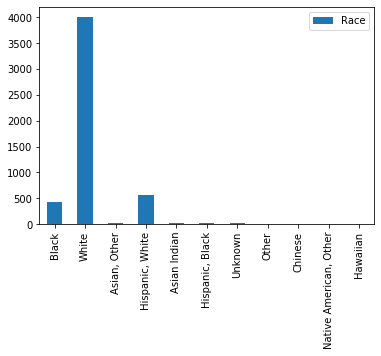

In [157]:
races = drug_df['Race'].dropna().unique()
race_count = drug_df['Race'].dropna().value_counts()
race_df = pd.DataFrame(race_count, index=races)
race_df.plot(kind='bar')

### [Q13 4 points] LocationifOther data check

The LocationifOther column is supposed to be used only if the Location column has the value "Other". Let us check this.

Count the number of rows where LocationifOther is not missing, but Location is not Other.

In [166]:
other_mask = drug_df['Location'] != "Other"
c = drug_df[['Location','LocationifOther']][other_mask].dropna(subset=['LocationifOther'])['Location'].value_counts()
print("There are {} rows where LocationifOther is not missing, but Location is not Other.".format(list(c)[0]))

There are 27 rows where LocationifOther is not missing, but Location is not Other.


### [Q14 4 points] What drugs never co-occur with OpiateNOS? **********************************

Two drugs co-occur if there is at least one death where both those drugs had a "Y" under their columns.
You should consider all the drugs whose names are listed in **drug_names**.

In [320]:
opNOS_mask = drug_df[drug_names]["OpiateNOS"] == "Y"

# def co_occur(s):
#     if drug_df[s].value_counts.index
opnos_df = drug_df[drug_names][opNOS_mask]
drug_names_2 = ['Heroin', 'Cocaine', 'Fentanyl', 'FentanylAnalogue', 'Oxycodone', 'Oxymorphone',
              'Ethanol', 'Hydrocodone', 'Benzodiazepine', 'Methadone', 'Amphet', 'Tramad',
              'Morphine_NotHeroin', 'Hydromorphone', 'AnyOpioid']
print("Heroin, FentanylAnalogue, and Hydromorphone never co-occur with OpiateNOS")
opnos_df.groupby('OpiateNOS')[drug_names_2].agg('count')

Heroin, FentanylAnalogue, and Hydromorphone never co-occur with OpiateNOS


,Heroin,Cocaine,Fentanyl,FentanylAnalogue,Oxycodone,Oxymorphone,Ethanol,Hydrocodone,Benzodiazepine,Methadone,Amphet,Tramad,Morphine_NotHeroin,Hydromorphone,AnyOpioid
OpiateNOS,,,,,,,,,,,,,,,
Y,0,9,15,0,17,1,18,4,32,5,4,4,13,0,72


### [Q15 4 points] Create a column called DeathCityLatLong

Extract the latitude and longitude from the DeathCityGeo column. For example,
* If DeathCityGeo is "Norwalk, CT\n(41.11805, -73.412906)", then the DeathCityLatLong column should have the value "41.11805, -73.412906"

Print out the DeathCityGeo and DeathCityLatLong columns for the first 5 rows.

In [215]:
def latlong(s):
    lst = re.findall('[0-9.-]+', s)
    return ','.join(lst) 

l = drug_df['DeathCityGeo'].map(latlong)

drug_df['DeathCityLatLong'] = l
drug_df[['DeathCityGeo', 'DeathCityLatLong']].head()


,DeathCityGeo,DeathCityLatLong
0,"CT\n(41.575155, -72.738288)","41.575155,-72.738288"
1,"Norwalk, CT\n(41.11805, -73.412906)","41.11805,-73.412906"
2,"Danbury, CT\n(41.393666, -73.451539)","41.393666,-73.451539"
3,"Greenwich, CT\n(41.026526, -73.628549)","41.026526,-73.628549"
4,"Greenwich, CT\n(41.026526, -73.628549)","41.026526,-73.628549"


### [Q16 6 points] Data check

* Find all deaths where the COD has two words, and the last word is Intoxication. Call these "one-COD deaths".
    * For example, if COD is "Cocaine Intoxication", then it is a one-COD death.
    * But if COD is "Cocaine and Heroin Intoxication", it is not a one-COD death.
* For every one-COD death, figure out how many drug_names were found in the person's blood
    * So if there was a "Y" under the columns "Cocaine" and "AnyOpioid", we count that as 2 drugs.
* Find out how many "one-COD deaths" actually had two or more drug_names in the person's blood.

**Note**: You may find that "Heroin" and "AnyOpioid" are both "Y", but the COD only says "Heroin Intoxication". We will count that as two drugs in the person's blood, even though Heroin is actually an Opioid and this is not really a data error.

In [236]:
def word_counter(s):
    lst = s.split()
    return len(lst) == 2 and lst[1] == "Intoxication"

mask3 = drug_df['COD'].map(word_counter)
one_COD_deaths_df = drug_df[mask3]

mask4 = one_COD_deaths_df[drug_names].count(axis=1) >= 2
len(one_COD_deaths_df[mask4])

32

### [ Q17 6 points] Plot the number of deaths every month.

The x-axis should be the month, and the y-axis the number of deaths (i.e., rows) for that month.

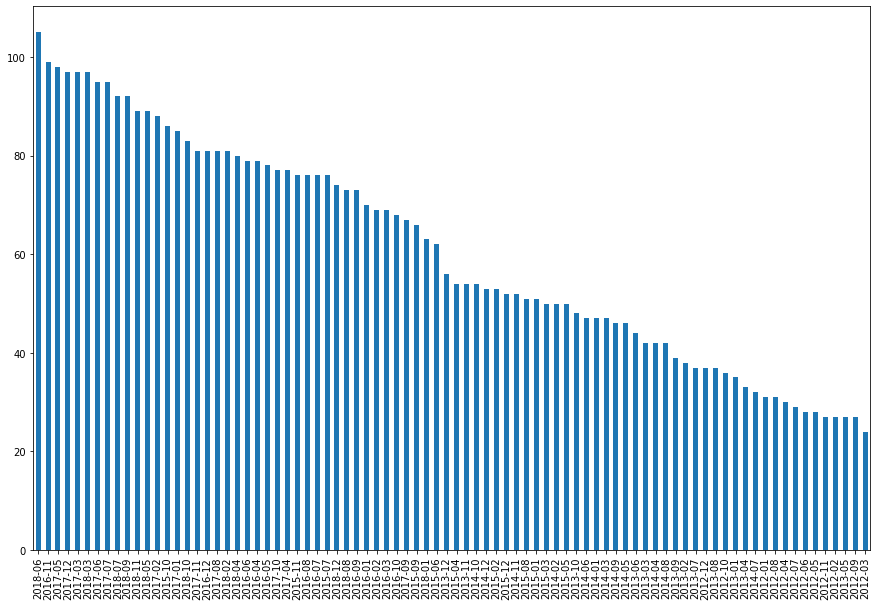

In [311]:
drug_df['Date'] = pd.to_datetime(drug_df['Date'])

def mm_yr(d):
    return d.to_period('M')

drug_df['Date_MM'] = drug_df['Date'].map(mm_yr)
drug_df['Date_MM'].value_counts().plot(kind='bar',figsize=(15,10))

### [Q18 6 points] Drug Cocktails
Look at deaths where COD mentions the word 'COMBINED'.
Among these deaths, count how many drugs were involved by checking how many of the drug name columns had a 'Y'
Show a bar plot where the x-axis is the number of drugs used, and the y-axis is the number of deaths caused by this drug cocktail.

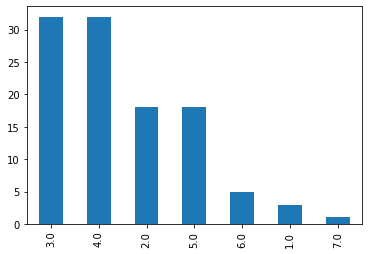

In [262]:
def mention(s):
    return "COMBINED" in s

mask5 = drug_df['COD'].map(mention)
x = drug_df[mask5][drug_names].count(axis=1)
drug_df['drug_cocktails_counts'] = x
drug_df[mask5]['drug_cocktails_counts'].value_counts().plot(kind='bar')

### [Q19 8 points] Differences between races

* For each DeathCity and Race, figure out how many people had a particular drug in their blood when they died. For example,
    * among Whites in City A, there may be 50 deaths with Cocaine and 12 with Heroin.
    * among Asians in City A, there may be 30 Heroin and 20 Cocaine deaths.
    * among Hispanics in City A, there may be 19 Cocaine and 18 Heroin deaths.
* Now, figure out the top drug which caused the most deaths for each DeathCity and Race. Only consider drugs that killed at least 20 people of that Race in that DeathCity; if there is no such drug, just act as if no one of that Race died in that DeathCity.
    * among Whites in City A, Cocaine is the top drug.
    * among Asians in City A, it is Heroin.
    * among Hispanics in City A, no drug led to at least 20 deaths, so there is no top drug.
* Now, print out the DeathCities for which the top drug is different for at least two Races.
    * Since the top drugs in City A are Cocaine (Whites) and Heroin (Asians), print out City A.
    * But if a City B had Cocaine (Whites) and Cocaine (Asians), don't print out City B.
    * Or if a City C had Heroin (Asians) but no other race had enough deaths to have a top drug, don't print out City C.

In [329]:
df23 = drug_df[['DeathCity', 'Race']].dropna()
ct_dr = pd.crosstab(drug_df['DeathCity'], drug_df['Race'])
ct_dr

Race,Asian Indian,"Asian, Other",Black,Chinese,Hawaiian,"Hispanic, Black","Hispanic, White","Native American, Other",Other,Unknown,White
DeathCity,,,,,,,,,,,
6340,0,0,0,0,0,0,0,0,0,0,1
AMSTON,0,0,0,0,0,0,0,0,0,0,1
ANDOVER,0,0,0,0,0,0,0,0,0,0,3
ANSONIA,0,0,2,0,0,0,1,0,0,0,20
ASHFORD,0,0,0,0,0,0,0,0,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...
WINSTED,0,0,0,0,0,0,0,0,0,0,12
WOLCOTT,0,0,0,0,0,0,1,0,0,0,1
WOODBRIDGE,0,0,0,0,0,0,0,0,0,0,4


---

We will try to predict chess games, using the file *games.csv*.

### [Q20(a) 7 points] Train and test accuracies

* Load in the games.csv file. 
* Split it into training and testing sets, where 80% of the data is used for training. 
* Use a logistic regression classifier to predict whether white will win or not.
    * Check if the "winner" column is "white" or not.
    * You should only use "white_rating", "black_rating" and "opening_name" as features. Don't use any other columns as features.
* Print the training and test accuracies.

In [277]:
games_df = pd.read_csv("games.csv")

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from patsy import dmatrices

games_df['target'] = 0.0
games_df['target'][games_df['winner'] == "white"] = 1.0

formula = 'target ~ 0 + white_rating + black_rating + opening_name'

y, x = dmatrices(formula, games_df, return_type='dataframe')

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

model = LogisticRegression()
result = model.fit(x_train, y_train)

yhat_train = model.predict(x_train)
train_acc = metrics.accuracy_score(y_train, yhat_train) # 0.6728156549918983

yhat = model.predict(x_test)
test_acc = metrics.accuracy_score(y_test, yhat)  #0.6333499501495513

print("Training Accuracy: {}       Test Accuracy: {}".format(train_acc, test_acc))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Accuracy: 0.6728156549918983       Test Accuracy: 0.6333499501495513


### [Q20(b) 3 points] Probability of win

Print the probability of white winning a game where the game has the following features:
* white_rating is 2000
* black_rating is 1500
* All other features are exactly the same as in the first row of the games.csv file.

In [284]:
new_games_df = pd.DataFrame({"turns": 13, "winner": "white", "white_rating":2000, "black_rating":1500, \
                             "opening_name":"Slav Defense: Exchange Variation", "opening_ply":5}, index=['0'])

new_games_df['target'] = 0.0
new_games_df['target'][new_games_df['winner'] == "white"] = 1.0

formula = 'target ~ 0 + white_rating + black_rating + opening_name'

y, x = dmatrices(formula, games_df, return_type='dataframe')

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

model = LogisticRegression()
result = model.fit(x_train, y_train)

yhat_train = model.predict(x_train)
train_acc = metrics.accuracy_score(y_train, yhat_train) # 0.6728156549918983

yhat = model.predict(x_test)
test_acc = metrics.accuracy_score(y_test, yhat)  #0.6333499501495513

print("Training Accuracy: {}       Test Accuracy: {}".format(train_acc, test_acc))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Accuracy: 0.6728156549918983       Test Accuracy: 0.6333499501495513


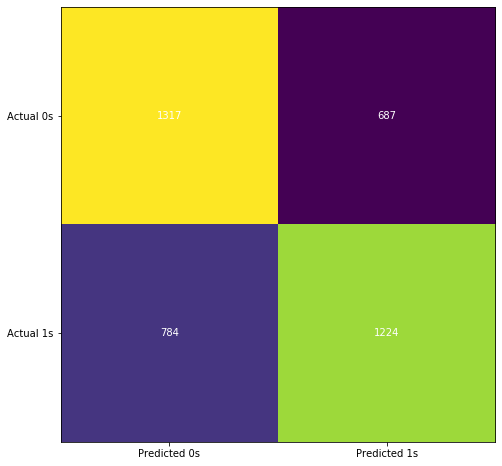

In [285]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_mat = confusion_matrix(y_test, yhat)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(confusion_mat)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, confusion_mat[i, j], ha='center', va='center', color='white')

In [287]:
specificity = (1224) / (1224 + 784)
print("The probability of white winning a game is: {}".format(specificity))

The probability of white winning a game is: 0.6095617529880478
